# Plots for ZFnet comparison
- Author: Ronak Desai

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
sns.set_context("notebook", font_scale=1.25)

## Comparison of different types of normalization
- Local Response Normalization (LRN)
    + used `torch.nn.LocalResponseNorm(size=5,alpha=10e-4,beta=0.75,k=2.0)` 
    + same parameters from the [AlexNet](https://dl.acm.org/doi/10.1145/3065386) Paper
- Local Contrast Normalization (LCN)
    + described in the [ZFNet](https://link.springer.com/chapter/10.1007/978-3-319-10590-1_53) paper
    + code modified from [dibyadas's GitHub repository](https://github.com/dibyadas/Visualize-Normalizations/blob/master/LocalContrastNorm.ipynb) due to no `torch.nn` implementation
- [Batch Normalization](https://dl.acm.org/doi/10.5555/3045118.3045167) (BN) seems to work best for controlling the activation outputs. This makes sense because VN is what is typically used nowadays instead of the other methods. However, BN was invented after ZFNet came out, that is why it was not used in the model 
- The Local Contrast Normalization doesn't work as well even though it is one of the improvements of ZFnet over AlexNet.
    + This may be due to using a custom implementation of LCN that may not be optimized.
    + It also takes longer than other methods. This is characteristic of LCN and is typically why it is not used

(95.0, 100.0)

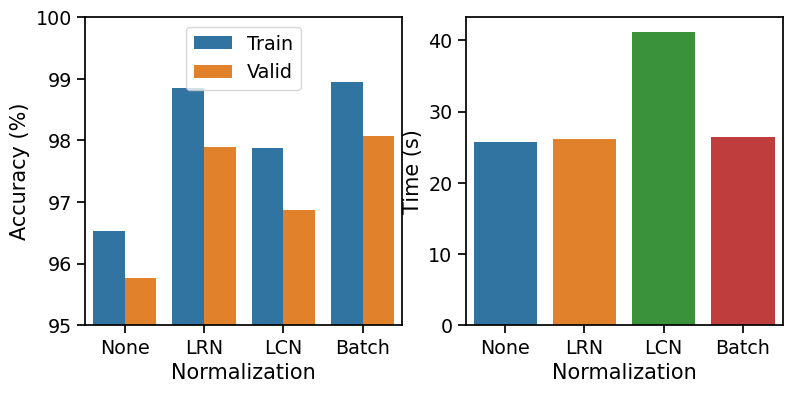

In [35]:
# Data from Running Notebooks
accuracy = np.array([96.533, 98.858, 97.883, 98.95, 95.767, 97.9, 96.867, 98.067])
times = np.array([25.8, 26.1, 41.2, 26.4]*2)
labels = np.array(['None', 'LRN', 'LCN', 'Batch']*2)
types = np.array(['Train']*4 + ['Valid']*4)

# Create a dataframe
df = pd.DataFrame({'Normalization': labels, 'Accuracy (%)': accuracy, 'Types': types, 'Time (s)': times})

# Plot
fig, ax = plt.subplots(1, 2, figsize=(9, 4))
sns.barplot(x='Normalization', y='Accuracy (%)', hue='Types', data=df, ax=ax[0])
sns.barplot(x='Normalization', y='Time (s)', data=df, ax=ax[1])
ax[0].legend(loc='upper center')

ax[0].set_ylim(95, 100)

## Comparison of Dropout Fraction
- Last 2 layers in the network use `nn.dropout`
    + Sets some fraction of the neurons in the layer to 0 for regularization to protect against overfitting
- In general, dropout seems to improve performance of models both in terms of training accuracy and validation accuracy
    + When dropout fraction is too high (e.g. 0.875), we get worse performance
    + Any fraction between 0.125 to 0.75 seems to give improved results

(94.0, 100.0)

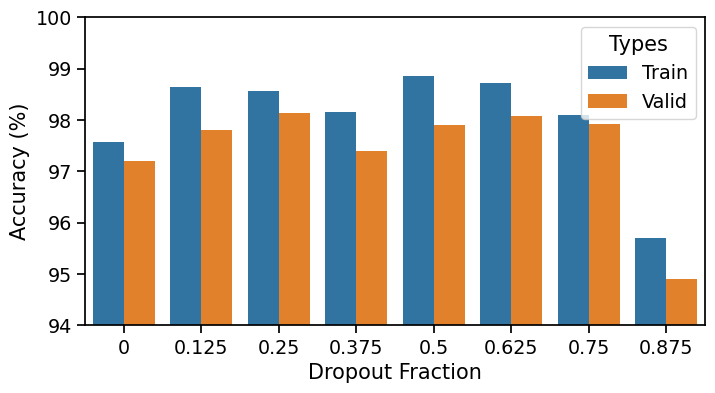

In [36]:
# Data from Running Notebooks
accuracy = np.array([97.57, 98.65, 98.56, 98.15, 98.86, 98.71, 98.1, 95.7, 97.2, 97.8, 98.13, 97.40, 97.90, 98.07, 97.93, 94.90])
times = np.array([25.89, 27.59, 26.46, 27.34, 26.11, 27.39, 26.07, 27.42]*2)
labels = np.array(['0', '0.125', '0.25', '0.375', '0.5', '0.625', '0.75', '0.875']*2)
types = np.array(['Train']*8 + ['Valid']*8)

# Create a dataframe
df = pd.DataFrame({'Dropout Fraction': labels, 'Accuracy (%)': accuracy, 'Types': types, 'Time (s)': times})

# Plot
fig, ax = plt.subplots(figsize=(8, 4))
sns.barplot(x='Dropout Fraction', y='Accuracy (%)', hue='Types', data=df, ax=ax)
#sns.barplot(x='Dropout Fraction', y='Time (s)', data=df, ax=ax[1])

ax.set_ylim(94, 100)